In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [12]:
data_calories=pd.read_csv("A:/Data Science/assignments/Linear Regression/calories_consumed.csv")

In [13]:
data_calories.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [20]:
data_calories.shape

(14, 2)

In [15]:
data_calories.dtypes

Weight gained (grams)    int64
Calories Consumed        int64
dtype: object

In [16]:
data_calories.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [24]:
data_calories.corr()

,Weight_gained,Calories_Consumed
Weight_gained,1.000000,0.946991
Calories_Consumed,0.946991,1.000000


In [23]:
data_calories=data_calories.rename(columns={'Weight gained (grams)':'Weight_gained','Calories Consumed':'Calories_Consumed'})

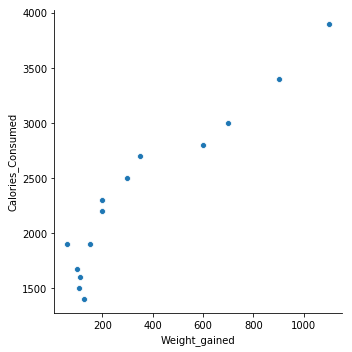

In [27]:
sns.relplot(x='Weight_gained',y='Calories_Consumed',data=data_calories,kind='scatter')

In [72]:
cal_scal=MinMaxScaler()
cal_scaleddata=cal_scal.fit_transform(data_calories)
cal_scaleddata=pd.DataFrame(cal_scaleddata,columns=('Weight_gained','Calories_Consumed'))

In [73]:
cal_scaleddata.head()

,Weight_gained,Calories_Consumed
0,0.044316,0.04
1,0.132948,0.36
2,0.807322,0.80
3,0.132948,0.32
4,0.229287,0.44


In [74]:
x=cal_scaleddata.Weight_gained
y=cal_scaleddata.Calories_Consumed

x=data_calories.Weight_gained
y=data_calories.Calories_Consumed

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [76]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
Y_train=Y_train.values.reshape(-1,1)
Y_test=Y_test.values.reshape(-1,1)

In [77]:
#Linear Model
cal_m=LinearRegression()
cal_model=cal_m.fit(X_train,Y_train)

In [85]:
predicted_calories=cal_model.predict(cal_scaleddata)
predicted_calories

ValueError: shapes (14,2) and (1,1) not aligned: 2 (dim 1) != 1 (dim 0)

In [79]:
cal_model.score(X_test,Y_test)

-0.12468303323354446

In [80]:
cal_model.intercept_

array([0.08357116])

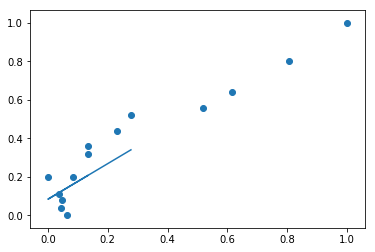

In [95]:
plt.scatter(cal_scaleddata.Weight_gained,cal_scaleddata.Calories_Consumed)
plt.plot(X_test,predicted_calories)

In [81]:
#Stats model
stat_cal=smf.OLS(Y_train,X_train,data=data_calories).fit()
stat_cal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     226.8
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           3.37e-08
Time:                        15:02:41   Log-Likelihood:                 9.4292
No. Observations:                  11   AIC:                            -16.86
Df Residuals:                      10   BIC:                            -16.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0501      0.070     15.059      0.000       0.895       1.205
==============================================================================
Omnibus:                        1.794   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.244
Skew:                           0.744   Prob(JB):                        0.537
Kurtosis:                       2.292   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""